In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline
np.__version__

'1.16.4'

In [8]:
# Loading data
df = pd.read_csv('C:\\Users\\viney.goyal\\Downloads\\Pokemon.csv')

# Selecting columns to consider
cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

df.tail(5)

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [7]:
# Data Scaling, so, columns are distributed around center of zero with a standard deviation of 1
scaler = StandardScaler().fit(df[cols])
df_scaled = scaler.transform(df[cols])

print(df_scaled[:,0].mean())
print(df_scaled[:,0].std())

[[-0.95062622 -0.92490618 -0.79715364 -0.2391303  -0.24818854 -0.80150318]
 [-0.3628221  -0.5241302  -0.34791742  0.21955954  0.29115635 -0.28501525]
 [ 0.42091674  0.09244823  0.29384863  0.83114599  1.01028289  0.40363531]
 ...
 [ 0.42091674  0.95565803 -0.44418232  2.36011211  2.08897269  0.05931003]
 [ 0.42091674  2.49710411 -0.44418232  2.97169856  2.08897269  0.40363531]
 [ 0.42091674  0.95565803  1.4811158   1.74852566  0.65071962  0.05931003]]
-2.486899575160351e-16
1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
#Choosing variance to 80% of original dataset
pca = PCA(n_components=0.8)
pca.fit(df_scaled)
pcscores = pd.DataFrame(pca.transform(df_scaled))
pcscores.columns = ['PC'+str(i+1) for i in range(len(pcscores.columns))]
loadings = pd.DataFrame(pca.components_, columns=cols)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]
loadings

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
PC1,0.389886,0.439254,0.363747,0.457162,0.448570,0.335440
PC2,0.084835,-0.011825,0.628789,-0.305414,0.239097,-0.668463
PC3,-0.471926,-0.594153,0.069339,0.305612,0.565594,0.078513
PC4,0.717691,-0.405836,-0.419237,0.147517,0.185445,-0.297163


[Text(0, 0.5, 'HP'),
 Text(0, 1.5, 'Attack'),
 Text(0, 2.5, 'Defense'),
 Text(0, 3.5, 'Sp. Atk'),
 Text(0, 4.5, 'Sp. Def'),
 Text(0, 5.5, 'Speed')]

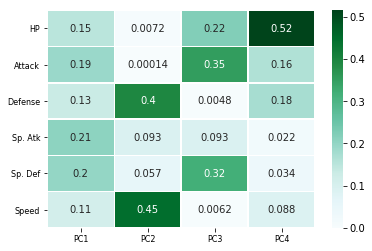

In [10]:
load_sqr = loadings**2
ax = sns.heatmap(load_sqr.transpose(), linewidths=0.5, cmap="BuGn", annot=True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, fontsize=8)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0, fontsize=8)

[Text(0, 0.5, 'HP'),
 Text(0, 1.5, 'Attack'),
 Text(0, 2.5, 'Defense'),
 Text(0, 3.5, 'Sp. Atk'),
 Text(0, 4.5, 'Sp. Def'),
 Text(0, 5.5, 'Speed')]

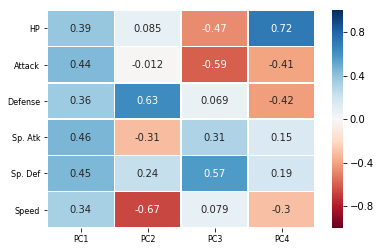

In [14]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, fontsize=8)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0, fontsize=8)

In [15]:
pc_types = pcscores.copy()
pc_types['Type'] = df['Type 1']
best = pc_types.sort_values(by='PC4', ascending=False)[:2]
df.loc[best.index]

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False


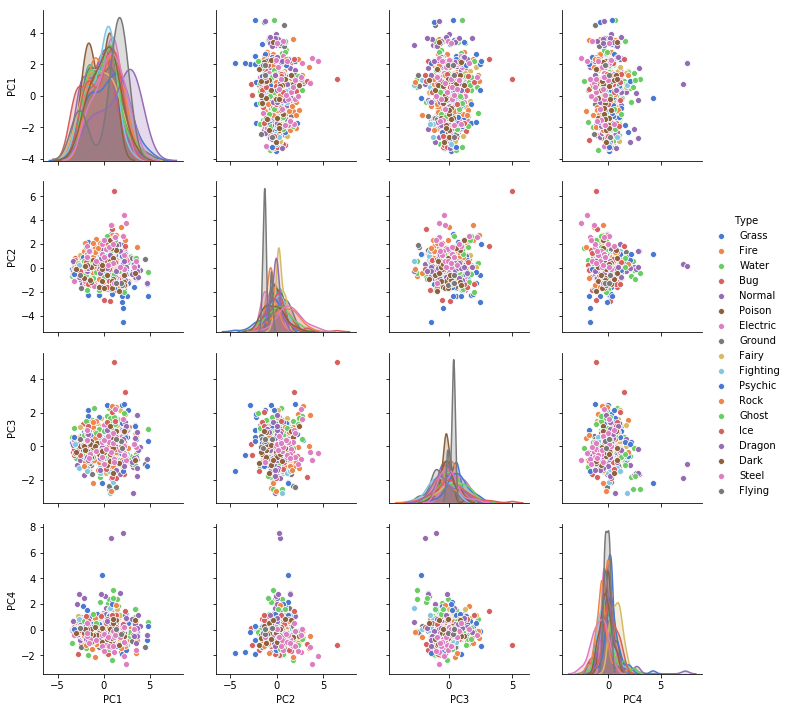

In [16]:
g = sns.pairplot(pc_types, hue='Type', palette='muted')

In [17]:
print(pc_types.sort_values(by='PC2', ascending=False)[:1])
print(pc_types.sort_values(by='PC3', ascending=False)[:1])

          PC1      PC2       PC3       PC4 Type
230  1.076565  6.41447  4.979344 -1.204517  Bug
          PC1      PC2       PC3       PC4 Type
230  1.076565  6.41447  4.979344 -1.204517  Bug


In [18]:
df.loc[230] # This is Shuckle, a bug-type Pokemon with very high Defense and Sp. Def at the cost of Attack attributes. 
#These will be located towards the top right (high PC2 and PC3 values).

id                213
Name          Shuckle
Type 1            Bug
Type 2           Rock
Total             505
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Name: 230, dtype: object